# <font color ='545aa7'> Chapter 12: Machine Learning using Scikit-Learn </font>

From **Scientific Computing for Chemists** by Charles Weiss. The document is copyright © 2021 Charles J. Weiss and is released under under the [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

**Note:** There is a random component to some of the following code, so exact results may vary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 12.1 Supervised Learning
### 12.1.1 Features and Information

In [2]:
ROH = pd.read_csv('ROH_data.csv', sep=',')
ROH.head()

bp     MW  carbons  degree  aliphatic  avg_aryl_position  cyclic
0  338  32.04        1       1          1                0.0       0
1  351  46.07        2       1          1                0.0       0
2  371  60.10        3       1          1                0.0       0
3  356  60.10        3       2          1                0.0       0
4  391  74.12        4       1          1                0.0       0

In [3]:
plt.scatter(ROH['MW'], ROH['bp'], alpha=0.5, c=ROH['degree'], cmap='viridis')
plt.colorbar()
plt.xlabel('MW, g/mol')
plt.ylabel('bp, K')

Text(0, 0.5, 'bp, K')

### 12.1.2 Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
target = ROH['bp']
features = ROH[[ 'MW', 'carbons', 'degree', 'aliphatic', 'avg_aryl_position','cyclic']]

In [6]:
X_train, X_test, y_train, y_test =train_test_split(features, target, test_size=0.25)

### 12.1.3 Training a Linear Regression Model

In [7]:
from sklearn import linear_model

In [8]:
reg = linear_model.LinearRegression()

In [9]:
reg.fit(X_train, y_train)

LinearRegression()

In [10]:
prediction = reg.predict(X_test)

In [11]:
plt.plot(prediction, y_test, 'o')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K')

Text(0, 0.5, 'True bp, K')

### 12.1.4 Model Evaluation

In [12]:
reg.score(X_test, y_test)

0.9682716268668013

In [13]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [14]:
splitter = ShuffleSplit(n_splits=5)

In [15]:
reg = linear_model.LinearRegression()

In [16]:
scores = cross_val_score(reg, features, target, cv=splitter)

In [17]:
scores

array([0.98685911, 0.95519489, 0.98529632, 0.97688771, 0.96655833])

In [18]:
scores.mean()

0.9741592713495605

## 12.1.5 Linear Models and Coefficients

In [19]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([ -5.77418705,  98.91380005, -16.28116735,  13.33005638,
        -0.62280407,  14.72770874])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target)

In [22]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
reg.coef_

array([-979.12694181, 1179.17564719,  -32.28090398,   -1.42672824,
        -18.64894126,    1.42672824])

### 12.1.5 Classification using Random Forests

### 12.1.6 Classify Chemical Compounds

In [24]:
data = pd.read_csv('org_comp.csv')
data.head

<bound method NDFrame.head of      class   bp      MW  C  cyclic  aromatic  unsaturation
0        0  455   94.11  6       1         1             3
1        0  475  108.14  7       1         1             3
2        0  475  108.14  7       1         1             3
3        0  464  108.14  7       1         1             3
4        0  474  122.17  8       1         1             3
..     ...  ...     ... ..     ...       ...           ...
117      2  498  135.21  9       1         1             3
118      2  407   99.17  6       1         0             1
119      2  381   85.15  5       1         0             1
120      2  327  113.20  7       1         0             1
121      2  463  127.23  8       1         0             1

[122 rows x 7 columns]>

In [25]:
target = data['class']
features = data.drop('class', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.predict(X_test)

array([2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 0])

In [28]:
rf.score(X_test, y_test)

0.7096774193548387

### 12.1.7 Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
conf_matrix = confusion_matrix(y_test, rf.predict(X_test))
conf_matrix

array([[8, 0, 5],
       [1, 7, 0],
       [3, 0, 7]])

Text(33.0, 0.5, 'Predicted Value')

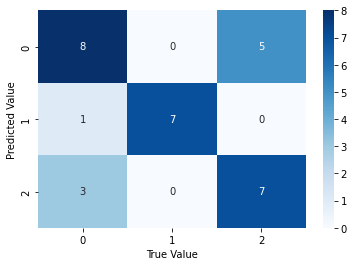

In [31]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

## 12.2 Unsupervised Learning
### 12.2.1 Dimensional Reduction
### 12.2.2 Load Wine Dataset

In [32]:
from sklearn.datasets import load_wine
wine = load_wine()

In [33]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [34]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [35]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [36]:
features = wine.data

In [37]:
target = wine.target

### 12.2.3 Reduce Dimensionality of Wine Dataset

In [38]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
SS = StandardScaler() 
features_ss = SS.fit_transform(features)

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)
trans_data = pca.fit_transform(features_ss)
trans_data.shape

(178, 2)

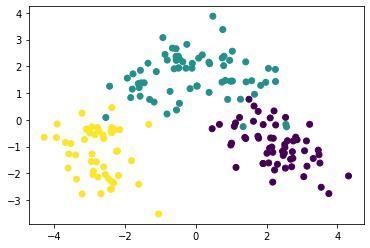

In [43]:
plt.scatter(trans_data[:,0], trans_data[:,1], c=target)

### 12.2.4 Clustering

In [44]:
from sklearn.datasets import make_blobs

In [45]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y)

In [46]:
SS = StandardScaler()
X_ss = SS.fit_transform(X)

In [47]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=0.4, min_samples=5)
DB.fit(X_ss)

DBSCAN(eps=0.4)

In [48]:
DB.labels_

array([ 0,  1,  0,  1,  0, -1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  1,
        0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,
        1,  0,  0,  0,  1,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

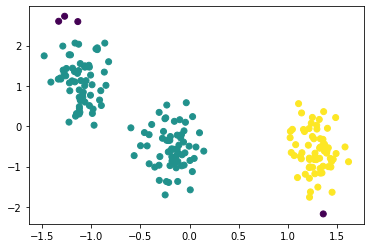

In [49]:
plt.scatter(X_ss[:,0], X_ss[:,1], c=DB.labels_)

### 12.2.5 Blind Signal Separation

In [50]:
import os
data_mix = []

for file in os.listdir():
    if file.lower().endswith('csv') and file.lower().startswith('mix'):
        data = np.genfromtxt(file, delimiter=',')
        data_mix.append(data[300:,1])
        wn = data[300:,0] # obtaining x-axis
                            
data_array_mix = np.vstack(data_mix).T
S = np.ndarray.astype(data_array_mix, float)

In [51]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=4)
S_fit = ica.fit_transform(S)

In [52]:
S_fit.shape

(6961, 4)

In [53]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,0])
plt.xlabel('Wavenumbers, cm$^{-1}$')
#plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

In [54]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,1])
plt.xlabel('Wavenumbers, cm$^{-1}$')
#plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

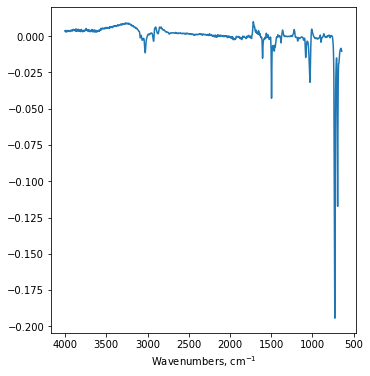

In [55]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,2])
plt.xlabel('Wavenumbers, cm$^{-1}$')
#plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

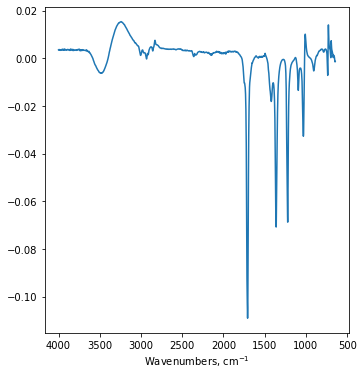

In [56]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,3])
plt.xlabel('Wavenumbers, cm$^{-1}$')
#plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

## Exercises

1. Import the data file **ROH_data.csv** containing data on simple alcohols and train a random forest algorithm to predict whether or not an alcohol is aliphatic. Remember to split the dataset using `train_test_split()` and evaluate the quality of the predictions.

Note: Some densities are missing in this dataset, so you will need to decide how to deal with this missing data.

2. Open the file titled **NMR_mixed.csv** which contains three $^1$H NMR spectra. Each spectrum (columns) is a mixture of three chemical compounds in different ratios (artificially generated). Use fastICA to separate out three pure $^1$H NMR spectra of each component. Compare your separated spectra to the pure NMR spectra in **NMR_pure.csv**.

3. Import the file titled **clusters.csv** containing unlabeled data with two features.

a) Use the DBSCAN algorithm to predict clusters for each datapoint in the set. Plot
the data points using color to represent each cluster.

b) Use the *k*-means algorithm (`sklearn.cluster.KMeans`) to predict clusters for each datapoint in the set. This may require you to visit the Scikit-Learn website to view the documentation for this algorithm and function. Plot the data points using color to represent each cluster.

4. Load the handwritten digits dataset using the `sklearn.datasets.load_digits()` function.

a) Reduce the dimensionality of the dataset to two principle components and visualize it. Color the markers based on the category. You will need to import PCA from `sklearn.decomposition`.

b) Train the Gaussian Naive Bays algorithm to classify the digits. Be sure to evaluate the effectiveness using a testing dataset. Import `GaussianNB` from `sklearn.naive_bayes`.